<a href="https://colab.research.google.com/github/DubeyArpita/Mental-Health-Analysis-Using-NLP/blob/main/Mental_Health_Analysis_Using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [6]:
df=pd.read_csv("/mental_health.csv",encoding="ISO-8859-1")
df

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1
...,...,...
27972,posting everyday people stop caring religion ...,0
27973,okay definetly need hear guys opinion ive pret...,0
27974,cant get dog think ill kill myselfthe last thi...,1
27975,whats point princess bridei really think like ...,1


In [7]:
df.dtypes

,0
text,object
label,int64


In [8]:
df["label"].unique()

array([0, 1])

In [9]:
msg=df.text
msg

,text
0,dear american teens question dutch person hear...
1,nothing look forward lifei dont many reasons k...
2,music recommendations im looking expand playli...
3,im done trying feel betterthe reason im still ...
4,worried year old girl subject domestic physic...
...,...
27972,posting everyday people stop caring religion ...
27973,okay definetly need hear guys opinion ive pret...
27974,cant get dog think ill kill myselfthe last thi...
27975,whats point princess bridei really think like ...


REMOVING SPECIAL CHARECTERS

In [10]:
msg=msg.str.replace('[^a-zA-Z0-9]+'," ")
msg

,text
0,dear american teens question dutch person hear...
1,nothing look forward lifei dont many reasons k...
2,music recommendations im looking expand playli...
3,im done trying feel betterthe reason im still ...
4,worried year old girl subject domestic physic...
...,...
27972,posting everyday people stop caring religion ...
27973,okay definetly need hear guys opinion ive pret...
27974,cant get dog think ill kill myselfthe last thi...
27975,whats point princess bridei really think like ...


CREATING A WORD CLOUD

In [11]:
# Assuming 'text_column' is the column in your DataFrame that contains the text data
text_corpus = ' '.join(df['text'].values)

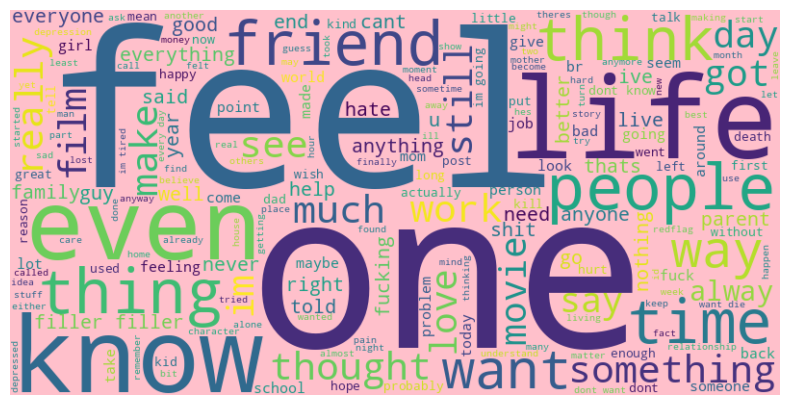

In [12]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='pink').generate(text_corpus)
# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

STEMMING AND TOKENISING

In [16]:
import nltk
from nltk.stem import PorterStemmer
nltk.download("punkt")
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
stemmer=PorterStemmer()
# Use split() for tokenization as an alternative to word_tokenize
msg=msg.apply(lambda line:[stemmer.stem(token.lower()) for token in line.split()]).apply(lambda token:" ".join(token))

In [18]:
msg=msg.apply(lambda line:[token for token in word_tokenize(line) if len(token)>2]).apply(lambda y:" ".join(y))

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

VECTORIZATION

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
data_vec=tf.fit_transform(msg)
print(data_vec)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1411603 stored elements and shape (27977, 54450)>
  Coords	Values
  (0, 11058)	0.24791849091720664
  (0, 1704)	0.20149949431691566
  (0, 46842)	0.19902012880657122
  (0, 38146)	0.1590745553723292
  (0, 13554)	0.30463028499702755
  (0, 35728)	0.11664502599696015
  (0, 20981)	0.1825297804935439
  (0, 20133)	0.2557670702200546
  (0, 18562)	0.07760461136099839
  (0, 52124)	0.10351927938950346
  (0, 13703)	0.19490088675448736
  (0, 47495)	0.09441474711962639
  (0, 26996)	0.33555630114030005
  (0, 936)	0.16631805303177513
  (0, 44124)	0.33639795722210636
  (0, 47934)	0.372419638753305
  (0, 19399)	0.32470250783624194
  (0, 27536)	0.07087011507761481
  (0, 39983)	0.11542773806418838
  (0, 29299)	0.21987335376865433
  (1, 27536)	0.11898629471508178
  (1, 33019)	0.38646914637635604
  (1, 28174)	0.1901482001824913
  (1, 17383)	0.30622246066922887
  (1, 27416)	0.4155500077173845
  :	:
  (27976, 28174)	0.09313742258447105
  (27976, 1287

In [21]:
y=df['label'].values
y

array([0, 1, 0, ..., 1, 1, 0])

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_vec,y,test_size=0.3,random_state=1)

MODEL CREATION

In [23]:
from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
sv=SVC()
# nb=GaussianNB()
rf=RandomForestClassifier()
ab= AdaBoostClassifier()
models=[sv,rf,ab]
for model in models:
  print(model)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(classification_report(y_test,y_pred))

SVC()
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      4252
           1       0.94      0.89      0.91      4142

    accuracy                           0.92      8394
   macro avg       0.92      0.92      0.92      8394
weighted avg       0.92      0.92      0.92      8394

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4252
           1       0.90      0.88      0.89      4142

    accuracy                           0.89      8394
   macro avg       0.89      0.89      0.89      8394
weighted avg       0.89      0.89      0.89      8394

AdaBoostClassifier()
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      4252
           1       0.90      0.77      0.83      4142

    accuracy                           0.85      8394
   macro avg       0.85      0.85      0.84      8394
weighted avg       0.8

In [24]:
y_new=model.predict(tf.transform(["im done trying feel betterthe reason "]))
if y_new==1:
    print("positive")
if y_new==0:
    print("negative")

negative


The higest accuracy is in SVC Classifier